In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from math import sqrt
# fonctions venant du tp précédent
def mean(dat):
    somme=0
    nbVal=0
    for elt in dat:
        somme+=elt
        nbVal+=1
    return somme/nbVal

def quantile(dat,p):
    dat=dat.copy()
    dat=sorted(dat)
    N=len(dat)
    j=int(N*p)
    if j==N*p:
        quantile=(dat[j-1]+dat[j])/2
    else:
        quantile=dat[int(j)]
    return quantile

def median(dat):
    return quantile(dat,0.5)

def stdev(dat):
    listeEcarts=[]
    moyenne=mean(dat)
    for elt in dat:
        listeEcarts.append(pow(elt-moyenne,2))
    return sqrt(mean(listeEcarts))

def cofvar(dat):
    return stdev(dat)/mean(dat)

def valrange(dat):
    return max(dat)-min(dat)

def iquarange(dat):
    return quantile(dat,0.75)-quantile(dat,0.25)

def scale(data,center=False,scale=False):
    moy=mean(data)
    e_t=stdev(data)
    if center:
        res=[]
        for elt in data:
            res.append(elt-moy)
        data=res
    if scale:
        print(i)
        res=[]
        for elt in data:
            res.append(elt/e_t)
        data=res
    return data
def to_ranks(data:list)->list:
    sorted_data=sorted(data)
    res=[]
    for elt in data:
        i=sorted_data.index(elt)+1
        
        res.append(i)   
    return res
def get_gdistr(dat:list):
    modalites=[]
    for elt in dat:
        if elt not in modalites:
            modalites.append(elt)
    res={}
    for modal in modalites:
        effectif=0
        for elt in dat:
            if elt==modal:
                effectif+=1
        res[modal]=(effectif,effectif/len(dat))
    return res
# Fonction utilisée pour la transformation logarithmique : 5.1 mais utile ci-après
def transf_log(data:list)->list:
    new_data=[]
    for elt in data:
        new_data.append(np.log(elt))
    return new_data

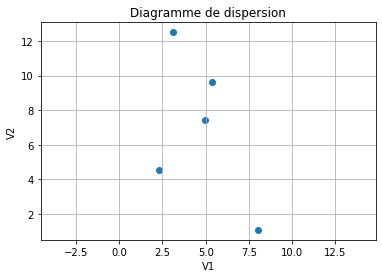

In [2]:
# Données
data_v1 = [3.12, 8.01, 4.99, 2.3, 5.39]
data_v2 = [12.5, 1.08, 7.44, 4.56, 9.65]
# Tracé du diagramme de dispersion
plt.scatter(data_v1, data_v2)
# Paramètres graphiques
plt.title('Diagramme de dispersion')   # Titre du graphique
plt.xlabel('V1')                       # Label du premier axe
plt.ylabel('V2')                       # Label du second
plt.axis('equal')                      # Ratio d'échelle des deux axes à 1
plt.grid()                             # Ajout d'une grille
# Affichage
plt.show()

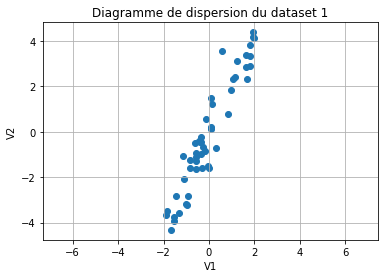

Le lien entre les deux jeux de données semble être : V2=2V1


In [3]:
# DATASET 1
data1_v1 = [-0.98, 1.81, 1.07, 1.8, 1.79, -0.56, 1.64, -0.03, 0.11, -0.85, -1.53, -1.47, 1.93, -0.35, -1.15, -0.84, 0.12, -0.35, -0.55, 0.84, -1.55, 1.99, 0.31, -1.0, -1.34, -0.43, 1.67, 0.07, -0.28, -0.33, 0.96, -0.93, -1.67, -0.3, -0.56, 1.95, 1.25, -0.57, 0.58, -1.87, -0.41, 0.08, 1.65, -0.02, -1.84, -0.15, -0.62, 1.14, -1.11, -0.16]
data1_v2 = [-3.21, 2.88, 2.34, 3.83, 3.35, -1.13, 2.84, -1.52, 1.49, -1.61, -3.91, -2.82, 4.38, -0.46, -1.05, -1.23, 1.2, -0.25, -1.62, 0.8, -3.76, 4.13, -0.7, -3.17, -3.59, -0.4, 2.31, 0.12, -0.65, -0.98, 1.84, -2.83, -4.32, -1.6, -1.27, 4.18, 3.12, -0.94, 3.54, -3.66, -0.43, 0.23, 3.36, -1.6, -3.48, 0.58, -0.51, 2.42, -2.1, -0.86]

plt.scatter(data1_v1, data1_v2)
# Paramètres graphiques
plt.title('Diagramme de dispersion du dataset 1')   # Titre du graphique
plt.xlabel('V1')                       # Label du premier axe
plt.ylabel('V2')                       # Label du second
plt.axis('equal')                      # Ratio d'échelle des deux axes à 1
plt.grid()                             # Ajout d'une grille
# Affichage
plt.show()
print("Le lien entre les deux jeux de données semble être : V2=2V1")

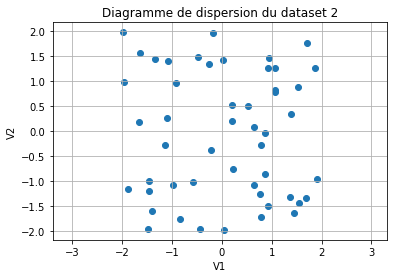

On peut constater l'apparition d'un rectangle...


In [4]:
# DATASET 2
data2_v1 = [0.79, -1.07, 1.87, 1.06, 0.23, 0.93, 0.76, 0.93, 1.37, 0.65, 0.02, -0.97, 0.95, -1.87, 1.9, 1.68, 1.38, 1.06, -1.39, 0.86, -0.25, -1.63, -1.46, 0.53, -1.47, -1.33, -1.46, -1.65, 0.64, 1.54, 0.21, 0.21, -0.92, -0.44, -0.58, -0.18, 1.53, -1.97, -0.22, -1.96, -1.13, -0.48, 0.87, 0.05, -0.83, 0.78, 1.06, -1.09, 1.71, 1.44]
data2_v2 = [-0.28, 1.41, 1.26, 0.79, -0.75, -1.51, -1.26, 1.27, -1.32, 0.08, 1.42, -1.09, 1.47, -1.16, -0.96, -1.34, 0.34, 0.83, -1.61, -0.86, 1.34, 1.57, -1.0, 0.5, -1.96, 1.45, -1.21, 0.19, -1.09, -1.44, 0.52, 0.21, 0.97, -1.96, -1.03, 1.96, 0.88, 1.98, -0.37, 0.98, -0.28, 1.48, -0.04, -1.98, -1.76, -1.72, 1.27, 0.27, 1.76, -1.64]

# Tracé du diagramme de dispersion
plt.scatter(data2_v1, data2_v2)
# Paramètres graphiques
plt.title('Diagramme de dispersion du dataset 2')   # Titre du graphique
plt.xlabel('V1')                       # Label du premier axe
plt.ylabel('V2')                       # Label du second
plt.axis('equal')                      # Ratio d'échelle des deux axes à 1
plt.grid()                             # Ajout d'une grille
# Affichage
plt.show()
print("On peut constater l'apparition d'un rectangle...")

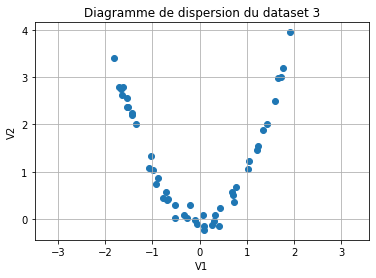

Nous avons l'apparition d'une courbe ressamblant à x^2


In [5]:
# DATASET 3
data3_v1 = [-1.42, -1.06, -0.2, 0.68, 1.34, -0.93, -1.44, -1.03, 0.33, 0.26, 1.05, -0.09, -0.7, 1.6, -1.67, 0.09, -0.77, 1.92, 0.09, 0.43, 0.4, -1.7, -0.51, -1.53, -1.54, 1.43, 0.31, -0.99, -1.35, -1.62, 1.66, -0.33, -0.89, -0.06, -0.72, 1.21, 1.77, 1.23, 1.03, 0.77, 0.07, -1.52, -1.82, 0.71, -0.66, 1.73, 0.73, -0.26, -1.65, -0.53]
data3_v2 = [2.21, 1.08, 0.3, 0.58, 1.89, 0.75, 2.25, 1.33, 0.08, -0.12, 1.22, -0.02, 0.4, 2.5, 2.74, -0.23, 0.45, 3.95, -0.15, 0.24, -0.15, 2.8, 0.03, 2.55, 2.37, 2.02, -0.05, 1.04, 2.0, 2.79, 2.98, 0.08, 0.86, -0.1, 0.58, 1.46, 3.19, 1.54, 1.06, 0.68, 0.09, 2.37, 3.4, 0.51, 0.43, 3.0, 0.37, 0.03, 2.62, 0.3]

# Tracé du diagramme de dispersion
plt.scatter(data3_v1, data3_v2)
# Paramètres graphiques
plt.title('Diagramme de dispersion du dataset 3')   # Titre du graphique
plt.xlabel('V1')                       # Label du premier axe
plt.ylabel('V2')                       # Label du second
plt.axis('equal')                      # Ratio d'échelle des deux axes à 1
plt.grid()                             # Ajout d'une grille
# Affichage
plt.show()
print("Nous avons l'apparition d'une courbe ressamblant à x^2")

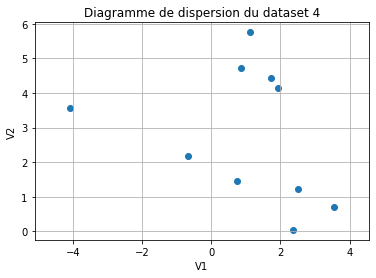

Rien de particulier pour celui-ci


In [6]:
# DATASET 4
data4_v1 = [1.1203136497073731, 1.7373078036934886, 2.368335223083779, 0.8730512267529372, -0.6624678143623997, 0.7428506107657022, -4.079893829055984, 3.5493465945904843, 2.4991307541783034, 1.9263584960720843]
data4_v2 = [5.758060834411365, 4.425462343941218, 0.043567920636212065, 4.714385829386762, 2.175717240926681, 1.463516586734358, 3.5715008567734836, 0.6925053961721359, 1.2313379873122037, 4.152430119150692]

# Tracé du diagramme de dispersion
plt.scatter(data4_v1, data4_v2)
# Paramètres graphiques
plt.title('Diagramme de dispersion du dataset 4')   # Titre du graphique
plt.xlabel('V1')                       # Label du premier axe
plt.ylabel('V2')                       # Label du second
plt.axis('equal')                      # Ratio d'échelle des deux axes à 1
plt.grid()                             # Ajout d'une grille
# Affichage
plt.show()
print("Rien de particulier pour celui-ci")

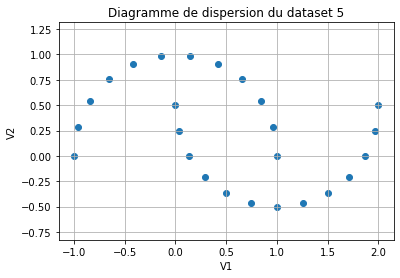

Nous avons ici l'apparition de deux coubres très régulières : 
une concave et une convexe formant deux demi-cercles parfaits.


In [7]:
# DATASET 5
data5_v1 = [0.741180954897479, 1.8660254037844384, 1.0, 0.9594929736144974, 0.2928932188134524, 0.8412535328311812, -0.9594929736144974, 0.6548607339452851, -0.142314838273285, 1.4999999999999998, 0.0, -0.8412535328311811, 0.41541501300188644, 1.9659258262890682, 2.0, -0.4154150130018863, 0.14231483827328512, 0.9999999999999999, 0.03407417371093169, -1.0, 1.7071067811865475, 0.4999999999999999, 1.2588190451025207, 0.1339745962155613, -0.654860733945285]
data5_v2 = [-0.4659258262890682, -3.3306690738754696e-16, 0.0, 0.28173255684142967, -0.20710678118654746, 0.5406408174555976, 0.28173255684142967, 0.7557495743542583, 0.9898214418809328, -0.3660254037844387, 0.5, 0.5406408174555978, 0.9096319953545183, 0.24118095489747904, 0.4999999999999999, 0.9096319953545184, 0.9898214418809327, -0.5, 0.24118095489747926, 1.2246467991473532e-16, -0.20710678118654757, -0.3660254037844386, -0.4659258262890683, 0.0, 0.7557495743542583]
# Tracé du diagramme de dispersion
plt.scatter(data5_v1, data5_v2)
# Paramètres graphiques
plt.title('Diagramme de dispersion du dataset 5')   # Titre du graphique
plt.xlabel('V1')                       # Label du premier axe
plt.ylabel('V2')                       # Label du second
plt.axis('equal')                      # Ratio d'échelle des deux axes à 1
plt.grid()                             # Ajout d'une grille
# Affichage
plt.show()
print("Nous avons ici l'apparition de deux coubres très régulières : ")
print("une concave et une convexe formant deux demi-cercles parfaits.")

    1.3 Liaison linéaire

In [8]:
def coefcor(x:list, y:list):
    lenX=len(x)
    if lenX!=len(y):
        print("Function coefcor: x and y haven't the same length!")
        coef=None
    else:
        coef=0
        meanX=mean(x)
        meanY=mean(y)
        for i in range(lenX):
            coef+=(x[i]-meanX)*(y[i]-meanY)
        coef/=lenX
        ecartTypes=stdev(x)*stdev(y)
        if ecartTypes==0:
            coef=0
        else:
            coef/=ecartTypes
    return coef

In [9]:
print(coefcor([1,2,3,4],[2,4,6,8]))
print(coefcor([1,2,3,1,2,3,1,2,3],[1,1,1,2,2,2,3,3,3]))
print(coefcor([1,2,3,4],[3,2,1,0]))

0.9999999999999998
0.0
-0.9999999999999998


In [10]:
print(coefcor(data1_v1,data1_v2))
print(coefcor(data2_v1,data2_v2))
print(coefcor(data3_v1,data3_v2))
print(coefcor(data4_v1,data4_v2))
print(coefcor(data5_v1,data5_v2))

0.9500627444358793
-0.033988116043301056
-0.04911085107492777
-0.3077359505677286
-0.3877969557577057


Il n'y a donc que le dataset 1 qui est linéaire(approximativement), comme remarqué ci-dessus.

1.4 Liaison non-linéaire

In [11]:
def coefspearman(x: list, y : list):
    if len(x)!=len(y):
        print("function coefspearman : x and y haven't the same length!")
        res = None
    else:
        res = coefcor(to_ranks(x),to_ranks(y))
    return res

In [12]:
print(coefspearman([1, 2, 3, 4, 5, 6, 7],[1, 4, 8, 16, 25, 36, 49]))
print(coefspearman([-4, -3, -2, -1, 0, 1, 2, 3, 4],[16, 9, 4, 1, 0, 1, 4, 9, 16]))
print(coefspearman([1,2,3,4],[8,8,8,8]))
print(coefspearman([-7, -6, -5, -4, -3, -2, -1],[49, 36, 25, 16, 9, 4, 1]))

1.0
-3.114339334501344e-17
0
-1.0


2 Quantitative Vs. Qualitative

In [13]:
def split_by(x:list, y:list):
    lenX=len(x)
    if lenX!=len(y):
        print("split_by : x and y haven't the same length!")
        res=None
    else:
        res={}
        for i in range(lenX):
            key=y[i]
            value=x[i]
            if key not in res.keys():
                res[key]=[value]
            else:
                res[key].append(value)
    return res

In [14]:
x = [6.1, 2.68, 3.35, 9.2, 9.75, 4.46, 1.99, 8.76, 2.52, 3.59, 4.12, 2.62, 8.01, 9.36, 7.03, 6.31, 7.49, 9.32, 9.89, 4.69, 6.41, 8.3, 4.15, 8.22, 6.03, 7.0, 8.37, 2.38, 7.07, 0.82, 3.06, 3.82, 4.0, 3.62, 4.76, 2.68, 2.79, 6.84, 8.25, 6.1]
y = ['A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B']
print(len(x),len(y))
print(split_by(x, y))

40 40
{'A': [6.1, 3.35, 9.2, 4.46, 8.76, 2.52, 4.12, 8.01, 9.36, 6.31, 9.32, 9.89, 6.41, 4.15, 8.22, 7.0, 2.38, 7.07, 3.06, 4.0, 3.62, 2.68, 6.84, 8.25], 'B': [2.68, 9.75, 1.99, 3.59, 2.62, 7.03, 7.49, 4.69, 8.3, 6.03, 8.37, 0.82, 3.82, 4.76, 2.79, 6.1]}


In [15]:
def describe_by(x:list, y:list):
    dico=split_by(x,y)
    res="                      "
    for key in dico.keys():
        res+=key+"    "
    res+="\nMoyenne         : "
    for key in dico.keys():
        res+=" "+str(round(mean(dico[key]),2))
    res+="\nMédiane         : "
    for key in dico.keys():
        res+=" "+str(round(median(dico[key]),2))
    res+="\nÉcart-type      : "
    for key in dico.keys():
        res+=" "+str(round(stdev(dico[key]),2))
    res+="\nCoef. de var.   : "
    for key in dico.keys():
        res+=" "+str(round(cofvar(dico[key]),2))
    res+="\nÉtendue         : "
    for key in dico.keys():
        res+=" "+str(round(valrange(dico[key]),2))
    res+="\nÉc. interquart. : "
    for key in dico.keys():
        res+=" "+str(round(iquarange(dico[key]),2))
    res+="\nPrem. quartile  : "
    for key in dico.keys():
        res+=" "+str(round(quantile(dico[key],0.25),2))
    res+="\nTrois. quartile : "
    for key in dico.keys():
        res+=" "+str(round(quantile(dico[key],0.75),2))
    print(res)
    return None

In [16]:
describe_by(x,y)

                      A    B    
Moyenne         :  6.05 5.05
Médiane         :  6.36 4.72
Écart-type      :  2.44 2.54
Coef. de var.   :  0.4 0.5
Étendue         :  7.51 8.93
Éc. interquart. :  4.42 4.52
Prem. quartile  :  3.81 2.74
Trois. quartile :  8.23 7.26


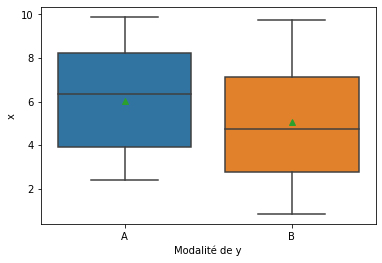

In [17]:
import seaborn as sns
d = split_by(x, y)
plt.figure()
sns.boxplot(
    data=[d[k] for k in d],
    showmeans=True,
)
plt.xlabel("Modalité de y")
plt.ylabel("x")
plt.xticks(plt.xticks()[0],['A','B'])
plt.show()

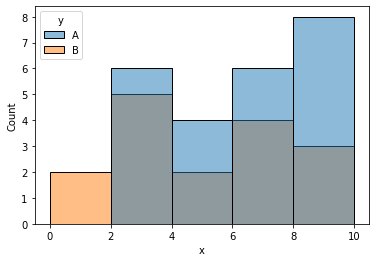

In [18]:
import pandas
plt.figure()
sns.histplot(data=pandas.DataFrame({'x':x, 'y':y}), x='x', hue='y', bins=[0,2,4,6,8,10])
plt.show()

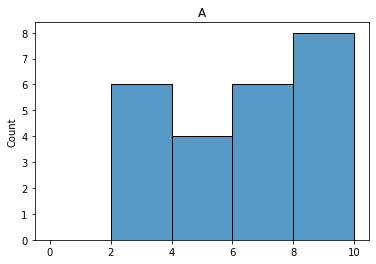

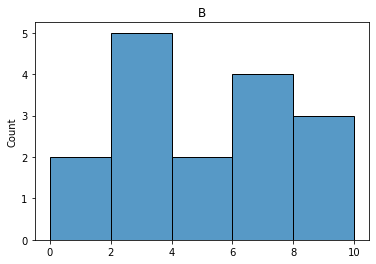

In [19]:
plt.figure()
sns.histplot(d['A'],bins=[0,2,4,6,8,10])
plt.title('A')
plt.show()
plt.figure()
plt.title('B')
sns.histplot(d['B'],bins=[0,2,4,6,8,10])
plt.show()

3 Qualitative Vs. Qualitative

In [20]:
def contingency_table(var1, var2, freq=False):
    dico={}
    length=len(var1)
    for i in range(length):
        key=(var1[i],var2[i])
        if key in dico.keys():
            dico[key]+=1
        else:
            dico[key]=1
    if freq:
        for key in dico.keys():
            dico[key]/=length
    return dico

In [21]:
var1 = ['tata', 'titi', 'titi', 'tata', 'toto', 
        'toto', 'toto', 'tata', 'toto', 'titi', 
        'tata', 'tata', 'tata', 'titi', 'toto', 
        'tata', 'tata', 'toto', 'titi', 'titi', 
        'toto', 'toto', 'titi', 'tata', 'tata', 
        'titi', 'titi', 'toto', 'toto', 'tata', 
        'toto', 'titi', 'toto', 'toto', 'titi', 
        'toto', 'toto', 'toto', 'tata', 'titi', 
        'tata', 'tata', 'titi', 'titi', 'toto', 
        'toto', 'titi', 'titi', 'toto', 'tata']

var2 = ['foo', 'foo', 'bar', 'bar', 'bar', 'foo', 'bar', 'foo', 'foo', 'bar', 
        'foo', 'foo', 'foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'foo', 
        'bar', 'foo', 'foo', 'foo', 'foo', 'foo', 'bar', 'foo', 'foo', 'bar', 
        'foo', 'foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar', 'foo', 
        'bar', 'foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar', 'foo', 'bar']

print(contingency_table(var1,var2))

{('tata', 'foo'): 9, ('titi', 'foo'): 9, ('titi', 'bar'): 7, ('tata', 'bar'): 6, ('toto', 'bar'): 8, ('toto', 'foo'): 11}


In [22]:
def pprint_contable(ct):
    M1 = list(set([k[0] for k in ct.keys()]))
    M2 = list(set([k[1] for k in ct.keys()]))
    maxnm1 = max([len(str(m)) for m in M1])
    maxnm2 = max([len(str(m)) for m in M2])
    maxnval = max([len(str(v)) for v in ct.values()])
    txt  = '+' + '-'*(maxnm1+2) + '+' + ('-'*(maxnm2+2) + '+')*len(M2) + '\n'
    txt += '|' + ' '*(maxnm1+2) + '|' + ''.join([""+str(m2).rjust(maxnm2+1)+""+' |' for m2 in M2]) + '\n'
    txt += '+' + '-'*(maxnm1+2) + '+' + ('-'*(maxnm2+2) + '+')*len(M2) + '\n'
    for m1 in M1:
        txt += '| ' +""+ str(m1).ljust(maxnm1+1) +""+ '|' + ''.join([str(ct[(m1,m2)]).rjust(maxnm2+1)+' |' for m2 in M2]) + '\n'
        txt += '+' + '-'*(maxnm1+2) + '+' + ('-'*(maxnm2+2) + '+')*len(M2) + '\n'
    print(txt)
    return None

pprint_contable(contingency_table(var1,var2))

+------+-----+-----+
|      | bar | foo |
+------+-----+-----+
| toto |   8 |  11 |
+------+-----+-----+
| titi |   7 |   9 |
+------+-----+-----+
| tata |   6 |   9 |
+------+-----+-----+



In [23]:
print(contingency_table(var1, var2, freq=True))
pprint_contable(contingency_table(var1, var2, freq=True))

{('tata', 'foo'): 0.18, ('titi', 'foo'): 0.18, ('titi', 'bar'): 0.14, ('tata', 'bar'): 0.12, ('toto', 'bar'): 0.16, ('toto', 'foo'): 0.22}
+------+-----+-----+
|      | bar | foo |
+------+-----+-----+
| toto |0.16 |0.22 |
+------+-----+-----+
| titi |0.14 |0.18 |
+------+-----+-----+
| tata |0.12 |0.18 |
+------+-----+-----+



In [24]:
def margin(dico:dict,m=0):
    if m==0:
        res=0
        for key in dico.keys():
            res+=dico[key]
    elif m==1:
        res={}
        for key in dico.keys():
            (imp,r)=key
            if imp in res:
                res[imp]+=dico[key]
            else:
                res[imp]=dico[key]
    elif m==2:
        res={}
        for key in dico.keys():
            (r,imp)=key
            if imp in res:
                res[imp]+=dico[key]
            else:
                res[imp]=dico[key]
    return res

In [25]:
print(margin(contingency_table(var1, var2), m=0))
print(margin(contingency_table(var1, var2), m=1))
print(margin(contingency_table(var1, var2), m=2))
print(margin(contingency_table(var1, var2, freq = True), m=0))
print(margin(contingency_table(var1, var2, freq = True), m=1))
print(margin(contingency_table(var1, var2, freq = True), m=2))

50
{'tata': 15, 'titi': 16, 'toto': 19}
{'foo': 29, 'bar': 21}
1.0
{'tata': 0.3, 'titi': 0.32, 'toto': 0.38}
{'foo': 0.58, 'bar': 0.42000000000000004}


In [26]:
def pprint_contable(cont, margin1=None, margin2=None, dec=None):
    if margin1 is not None:
        marg1 = margin1.copy()
    else:
        marg1 = None
    if margin2 is not None:
        marg2 = margin2.copy()
    else:
        marg2 = None
    ct = cont.copy()
    if dec is not None:
        for k in ct:
            ct[k] = round(ct[k],dec)
        if marg1 is not None:
            for k in marg1:
                marg1[k] = round(marg1[k],dec)
        if marg2 is not None:
            for k in marg2:
                marg2[k] = round(marg2[k],dec)
    M1 = list(set([k[0] for k in ct.keys()]))
    M2 = list(set([k[1] for k in ct.keys()]))
    maxnm1 = max([len(str(m)) for m in M1])
    maxnm2 = max([len(str(m)) for m in M2])
    maxnval = max([len(str(v)) for v in ct.values()])
    if marg1 is not None:
        maxnval = max([maxnval,max([len(str(v)) for v in marg1.values()])])
    if marg2 is not None:
        maxnval = max([maxnval,max([len(str(v)) for v in marg2.values()])])        
    maxnm2 = max([maxnm2, maxnval, 5])
    maxnm1 = max([maxnm1, 5])
    txt  = '+' + '-'*(maxnm1+2) + '+' + ('-'*(maxnm2+2) + '+')*len(M2) + ('' if marg1 is None else ('-'*(maxnm2+2) + '+') ) +'\n'
    txt += '|' + ' '*(maxnm1+2) + '|' + ''.join(["\u001b[1m\u001b[92m"+str(m2).rjust(maxnm2+1)+"\u001b[0m"+' |' for m2 in M2]) +  ('' if marg1 is None else "\u001b[1m\u001b[94m\u001b[7m"+str('TOTAL').rjust(maxnm2+1)+"\u001b[0m"+' |')+ '\n'
    txt += '+' + '-'*(maxnm1+2) + '+' + ('-'*(maxnm2+2) + '+')*len(M2) + ('' if marg1 is None else ('-'*(maxnm2+2) + '+') ) + '\n'
    for m1 in M1:
        txt += '| ' + "\u001b[1m\u001b[94m"+str(m1).ljust(maxnm1+1)+"\u001b[0m" + '|' + ''.join([str(ct[(m1,m2)]).rjust(maxnm2+1) + ' |' for m2 in M2]) +  ('\n' if marg1 is None else ("\u001b[1m\u001b[94m\u001b[7m"+str(marg1[m1]).rjust(maxnm2+1) +"\u001b[0m"+ ' |' + '\n'))
        txt += '+' + '-'*(maxnm1+2) + '+' + ('-'*(maxnm2+2) + '+')*len(M2) + ('' if marg1 is None else ('-'*(maxnm2+2) + '+') ) + '\n'
    if marg2 is not None:
        txt += '| ' + "\u001b[1m\u001b[92m\u001b[7m"+'TOTAL'.ljust(maxnm1+1) +"\u001b[0m"+ '|' + ''.join(["\u001b[1m\u001b[92m\u001b[7m"+str(marg2[m2]).rjust(maxnm2+1)+"\u001b[0m"+' |' for m2 in M2]) + "\u001b[1m\u001b[7m"+str(sum(marg2.values())).rjust(maxnm2+1)+"\u001b[0m"+' |' + '\n'
        txt += '+' + '-'*(maxnm1+2) + '+' + ('-'*(maxnm2+2) + '+')*len(M2) + ('' if marg1 is None else ('-'*(maxnm2+2) + '+') ) + '\n'
    print(txt)
    return None

pprint_contable(contingency_table(var1, var2))

pprint_contable(contingency_table(var1, var2),
                margin(contingency_table(var1, var2),1),
                margin(contingency_table(var1, var2),2))

pprint_contable(contingency_table(var1, var2, freq=True),
                margin(contingency_table(var1, var2, freq=True),1),
                margin(contingency_table(var1, var2, freq=True),2), dec=2)

+-------+-------+-------+
|       |   bar |   foo |
+-------+-------+-------+
| toto  |     8 |    11 |
+-------+-------+-------+
| titi  |     7 |     9 |
+-------+-------+-------+
| tata  |     6 |     9 |
+-------+-------+-------+

+-------+-------+-------+-------+
|       |   bar |   foo | TOTAL |
+-------+-------+-------+-------+
| toto  |     8 |    11 |    19 |
+-------+-------+-------+-------+
| titi  |     7 |     9 |    16 |
+-------+-------+-------+-------+
| tata  |     6 |     9 |    15 |
+-------+-------+-------+-------+
| TOTAL |    21 |    29 |    50 |
+-------+-------+-------+-------+

+-------+-------+-------+-------+
|       |   bar |   foo | TOTAL |
+-------+-------+-------+-------+
| toto  |  0.16 |  0.22 |  0.38 |
+-------+-------+-------+-------+
| titi  |  0.14 |  0.18 |  0.32 |
+-------+-------+-------+-------+
| tata  |  0.12 |  0.18 |   0.3 |
+-------+-------+-------+-------+
| TOTAL |  0.42 |  0.58 |   1.0 |
+-------+-------+-------+-------+



3.1 Coefficients d’association

In [27]:
def dchi2(cont):
    marg1 = margin(cont, 1)
    marg2 = margin(cont, 2)
    N = margin(cont, 0)
    d2 = 0
    for m1 in marg1.keys():
        for m2 in marg2.keys():
            n_the = (marg1[m1] * marg2[m2]) / N
            n_obs = cont[(m1,m2)]
            d2 += ((n_obs - n_the)**2) / n_the
    return d2

In [28]:
print(dchi2(contingency_table(var1, var2)))

0.04483190735459339


In [29]:
def v_cramer(var1,var2):
    n=len(var1)
    X1=[]
    for elt in var1:
        if elt not in X1:
            X1.append(elt)
    X2=[]
    for elt in var2:
        if elt not in X2:
            X2.append(elt)
    l=len(X1)
    c=len(X2)
    qui2=dchi2(contingency_table(var1, var2))
    res2=qui2/(n*(min(l,c)-1))
    return sqrt(res2)
    

In [30]:
print(v_cramer(var1, var2))

0.02994391669591451


4. Problèmes et mise en pratique

In [31]:
data = [('Fille', 'A', 'Echec'),     ('Fille', 'A',  'Echec'),     ('Garcon', 'A', 'Echec'), 
        ('Fille', 'A', 'Echec'),     ('Fille', 'A',  'Echec'),     ('Fille', 'B', 'Reussite'), 
        ('Garcon', 'B', 'Reussite'), ('Fille', 'B',  'Reussite'),  ('Fille', 'B', 'Reussite'), 
        ('Garcon', 'B', 'Reussite'), ('Fille', 'A',  'Reussite'),  ('Fille', 'A', 'Echec'), 
        ('Fille', 'A', 'Echec'),     ('Fille', 'A',  'Echec'),     ('Fille', 'A', 'Echec'), 
        ('Fille', 'B', 'Reussite'),  ('Garcon', 'B', 'Reussite'),  ('Garcon', 'A', 'Echec'), 
        ('Garcon', 'B', 'Reussite'), ('Garcon', 'B', 'Reussite'),  ('Garcon', 'B', 'Echec'), 
        ('Garcon', 'A', 'Echec'),    ('Garcon', 'B', 'Reussite'),  ('Garcon', 'B', 'Reussite'), 
        ('Fille', 'B', 'Reussite'),  ('Garcon', 'A', 'Echec'),     ('Garcon', 'B', 'Reussite'), 
        ('Garcon', 'A', 'Echec'),    ('Garcon', 'B', 'Reussite'),  ('Fille', 'A', 'Echec')]

In [32]:
s=get_gdistr(data)
if ('Garcon','A','Reussite') not in s.keys():
    s[('Garcon','A','Reussite')]=(0,0)
if ('Fille','B','Echec') not in s.keys():
    s[('Fille','B','Echec')]=(0,0)
print("    - Lycée A")
print("        Pourcentage de réussite des filles : "+str(s[('Fille', 'A',  'Reussite')][0]/(s[('Fille', 'A',  'Reussite')][0]+s[('Fille', 'A',  'Echec')][0])))
print("        Pourcentage de réussite des garçons : "+str(s[('Garcon', 'A',  'Reussite')][0]/(s[('Garcon', 'A',  'Reussite')][0]+s[('Garcon', 'A',  'Echec')][0])))
print("    - Lycée B :")
print("        Pourcentage de réussite des filles : "+str(s[('Fille', 'B',  'Reussite')][0]/(s[('Fille', 'B',  'Reussite')][0]+s[('Fille', 'B',  'Echec')][0])))
print("        Pourcentage de réussite des garçons : "+str(s[('Garcon', 'B',  'Reussite')][0]/(s[('Garcon', 'B',  'Reussite')][0]+s[('Garcon', 'B',  'Echec')][0])))


    - Lycée A
        Pourcentage de réussite des filles : 0.1
        Pourcentage de réussite des garçons : 0.0
    - Lycée B :
        Pourcentage de réussite des filles : 1.0
        Pourcentage de réussite des garçons : 0.9


Donc en effet, les chiffres montrent que les filles obtiennent plus volontier leurs voeux.

In [33]:
fille=0
garcon=0
length=len(data)
for elt in data:
    if elt[0]=='Fille':
        fille+=1/length
    elif elt[0]=='Garcon':
        garcon+=1/length
print("- Pourcentage de réussite des filles : "+str(fille))
print("- Pourcentage de réussite des garçons : "+str(garcon))

- Pourcentage de réussite des filles : 0.49999999999999994
- Pourcentage de réussite des garçons : 0.49999999999999994


Les deux ont les mêmes chances.

Je ne sais pas

Exercice ALIMENTATION ET PERFORMANCES

In [34]:
data = [(274, 3.42), (1339, 16.74), (1244, 15.55), (363, 4.54), (1524, 19.05), (602, 12.49), (273, 3.41), (1306, 16.33), (770, 8.63), (313, 9.35), (1312, 16.4), (851, 11.15), (489, 12.15), (1289, 12.55), (922, 7.55), (651, 11.45), (1173, 15.83), (840, 11.07), (145, 1.81), (1444, 18.05), (1196, 16.05), (315, 3.94), (291, 10.1), (1089, 9.7), (1483, 18.54), (338, 4.22), (102, 1.27), (1208, 15.1), (278, 3.48), (1280, 16.0), (1235, 15.44), (1593, 19.91), (1285, 16.06), (1434, 17.93), (100, 1.25), (21, 0.26), (1227, 15.34), (1099, 15.89), (293, 3.66), (872, 9.81), (1538, 19.23), (1235, 14.61), (501, 6.1), (1414, 17.68), (1254, 15.68), (1480, 18.5), (637, 13.87), (209, 2.61), (1274, 15.93), (1322, 16.52), (1537, 19.21), (348, 4.35), (1334, 16.68), (1466, 18.33), (1492, 18.65), (1405, 17.56), (832, 9.7), (295, 3.69), (1511, 18.89), (72, 0.9), (1410, 17.62), (1548, 19.35), (858, 10.93), (286, 3.58), (395, 4.94), (1421, 17.76), (201, 2.51), (1477, 18.46), (359, 4.49), (1274, 15.57), (652, 6.09), (271, 3.39), (1515, 18.94), (39, 0.49), (353, 4.41), (203, 2.54), (991, 16.31), (1408, 17.6), (389, 4.86), (672, 14.55), (1541, 19.26), (153, 1.91), (838, 10.84), (1278, 15.98), (1521, 19.01), (109, 1.36), (502, 13.33), (1216, 11.14), (842, 10.8), (45, 0.56), (1287, 13.7), (114, 1.43), (475, 4.77), (1046, 9.99), (631, 10.1), (281, 3.51), (745, 12.6), (1348, 16.85), (43, 0.54), (1235, 15.14), (372, 4.65), (306, 3.83), (333, 4.16), (362, 4.53), (860, 6.57), (1246, 11.46), (928, 16.3), (740, 12.57), (48, 0.6), (1441, 18.01), (492, 12.04), (1388, 17.35), (1384, 17.3), (1520, 19.0), (605, 12.5), (369, 4.61), (1229, 15.36), (488, 6.16), (1357, 16.96), (1439, 17.99), (47, 0.59), (1389, 17.36), (117, 1.46), (1401, 17.51), (1153, 15.51), (689, 13.67), (1294, 16.18), (835, 15.96), (1335, 16.69), (492, 10.98), (1200, 15.0), (258, 3.23), (481, 12.41), (837, 10.82), (276, 3.45), (1584, 19.8), (722, 15.11), (1291, 13.58), (156, 1.95), (792, 15.66), (864, 11.12), (1432, 17.9), (959, 7.54), (1277, 15.96), (366, 5.34), (191, 2.39), (603, 12.41), (34, 0.42), (1350, 16.88), (1242, 15.53), (208, 2.6), (1503, 18.79), (1338, 16.73), (341, 4.26), (1522, 19.03), (1588, 19.85), (222, 2.77), (15, 0.19), (854, 11.02), (1471, 18.39), (970, 11.05), (243, 3.04), (606, 7.57), (1463, 18.29), (148, 1.85), (1409, 17.61), (1283, 16.04), (1221, 15.86), (375, 4.69), (1169, 10.61), (349, 4.36), (223, 2.79), (682, 4.52), (215, 2.69), (24, 0.3), (119, 1.49), (809, 15.81), (1017, 10.14), (654, 4.5), (558, 4.56), (1451, 18.14), (378, 4.72), (1309, 16.36), (677, 7.6), (1385, 17.31), (1029, 10.26), (771, 12.71), (1570, 19.62), (1399, 17.49), (357, 10.8), (20, 0.25), (394, 4.93), (386, 11.05), (1589, 19.86), (1195, 16.08), (82, 1.02), (303, 3.79), (399, 4.99), (320, 4.0), (1202, 15.03), (133, 1.66), (1215, 15.81), (1035, 9.1), (779, 7.83), (1290, 16.12), (280, 3.5), (257, 3.21), (663, 11.23), (1484, 18.55), (649, 9.99), (85, 1.06), (120, 1.5), (1367, 17.09), (1365, 17.06), (324, 4.05), (1301, 16.26), (401, 11.17), (1411, 17.64), (1583, 19.79), (1314, 16.43), (696, 13.59), (411, 6.9), (1506, 18.82), (152, 1.9), (55, 0.69), (380, 4.75), (1240, 15.5), (210, 2.62), (1232, 15.4), (843, 10.81), (1036, 10.31), (185, 2.31), (354, 4.42), (66, 0.83), (1028, 16.22), (840, 10.8), (344, 4.3), (313, 3.91), (1279, 15.99), (1218, 14.43), (675, 4.54), (858, 11.05), (958, 8.18), (778, 8.11), (590, 11.78), (3, 0.04), (110, 1.38), (1133, 15.68), (853, 10.85), (946, 12.06), (1324, 16.55), (1111, 9.94), (1581, 19.76), (227, 2.84), (402, 8.58), (1336, 16.7), (1494, 18.68), (770, 7.49), (181, 2.26), (668, 11.69), (1284, 16.05), (233, 2.91), (1251, 15.64), (1245, 15.56), (244, 3.05), (1512, 18.9), (221, 2.76), (311, 3.89), (1452, 18.15), (1573, 19.66), (350, 4.38), (773, 8.52), (1508, 18.85), (355, 4.44), (1333, 16.66), (318, 3.98), (289, 3.61), (1292, 12.83), (231, 2.89), (1472, 18.4), (1144, 15.6), (131, 1.64), (411, 11.24), (733, 12.52), (1045, 9.98), (912, 7.62), (29, 0.36), (264, 3.3), (1446, 18.08), (1072, 9.29), (69, 0.86), (582, 12.51), (1271, 15.89), (1120, 15.75), (1551, 19.39), (1302, 16.27), (455, 6.38), (913, 7.59), (835, 15.95), (628, 6.02), (323, 4.04), (858, 6.52), (1433, 17.91), (395, 7.29), (839, 5.75), (497, 8.02), (346, 4.33), (166, 2.08), (285, 3.56), (1264, 15.64), (1397, 17.46), (1362, 17.02), (1093, 15.92), (1237, 11.36), (88, 1.1), (214, 2.67), (851, 6.33), (656, 14.43), (1165, 15.82), (1250, 15.62), (1457, 18.21), (275, 3.44), (25, 0.31), (292, 3.65), (332, 4.15), (392, 7.8), (298, 3.73), (378, 11.02), (1490, 18.62), (998, 8.71), (80, 1.0), (1431, 17.89), (334, 4.17), (1210, 14.93), (287, 3.59), (990, 7.77), (324, 9.23), (1237, 15.46), (1371, 17.14), (106, 1.32), (1253, 15.66), (377, 4.71), (1212, 15.15), (180, 2.25), (1104, 9.88), (1379, 17.24), (173, 2.16), (176, 2.2), (1498, 18.73), (671, 13.77), (1257, 15.71), (1489, 18.61), (846, 6.02), (847, 10.74), (319, 3.99), (1040, 9.78), (858, 11.14), (14, 0.17), (1572, 19.65), (1023, 16.23), (1566, 19.57), (1204, 15.05), (272, 3.4), (581, 7.64), (1455, 18.19), (1219, 15.24), (361, 4.51), (30, 0.38), (175, 2.19), (1136, 15.63), (225, 2.81), (1528, 19.1), (1263, 15.79), (366, 4.58), (212, 2.65), (842, 5.76), (104, 1.3), (126, 1.57), (93, 1.16), (6, 0.07), (1318, 16.48), (770, 7.4), (666, 10.87), (1068, 9.51), (1576, 19.7), (138, 1.73), (1205, 15.06), (568, 5.94), (778, 8.32), (41, 0.51), (587, 12.24), (706, 14.95), (1543, 19.29), (848, 11.17), (113, 1.41), (345, 4.31), (1394, 17.43), (1470, 18.38), (31, 0.39), (9, 0.11), (157, 1.96), (368, 4.6), (1211, 15.14), (1546, 19.32), (1413, 17.66), (939, 10.32), (1396, 17.45), (70, 0.88), (87, 1.09), (984, 7.68), (122, 1.52), (1291, 16.14), (1527, 19.09), (137, 1.71), (161, 2.01), (1261, 15.76), (598, 13.89), (1267, 15.62), (1285, 13.69), (1488, 18.6), (670, 11.76), (260, 3.25), (1293, 16.16), (299, 3.74), (373, 4.66), (1273, 15.91), (677, 14.62), (217, 2.71), (1465, 18.31), (691, 9.67), (849, 11.0), (1544, 19.3), (404, 5.08), (730, 9.95), (478, 11.75), (1419, 17.74), (1266, 15.83), (1415, 17.69), (128, 1.6), (816, 12.76), (1482, 18.53), (608, 14.18), (770, 8.61), (124, 1.55), (1585, 19.81), (1231, 15.39), (593, 12.55), (1355, 16.94), (505, 10.89), (96, 1.2), (1395, 17.44), (1383, 17.29), (866, 16.09), (595, 12.58), (184, 2.3), (1303, 16.29), (1251, 14.37), (1594, 19.93), (1460, 18.25), (97, 1.21), (1266, 14.12), (54, 0.67), (182, 2.27), (1509, 18.86), (343, 4.29), (1557, 19.46), (1343, 16.79), (7, 0.09), (1284, 13.85), (284, 3.55), (593, 12.37), (1304, 16.3), (412, 11.24), (535, 5.97), (317, 3.96), (162, 2.02), (1084, 9.32), (1562, 19.53), (12, 0.15), (68, 0.85), (516, 12.04), (1282, 16.02), (1532, 19.15), (98, 1.22), (165, 2.06), (1487, 18.59), (220, 2.75), (13, 0.16), (1289, 16.11), (134, 1.67), (1025, 9.03), (112, 1.4), (1328, 16.6), (1429, 17.86), (35, 0.44), (1369, 17.11), (403, 5.99), (189, 2.36), (398, 4.97), (884, 16.16), (615, 11.62), (205, 2.56), (1275, 15.94), (1098, 15.92), (1320, 16.5), (673, 4.51), (1225, 15.31), (149, 1.86), (365, 4.56), (1222, 15.28), (1578, 19.73), (695, 13.63), (758, 12.67), (949, 7.51), (1368, 17.1), (519, 10.77), (310, 3.88), (843, 10.78), (249, 3.11), (1218, 15.23), (1256, 15.7), (49, 0.61), (327, 10.44), (1321, 16.51), (330, 4.12), (105, 1.31), (1378, 17.23), (86, 1.07), (1535, 19.19), (597, 10.3), (503, 4.67), (555, 4.57), (363, 8.29), (591, 11.75), (1592, 19.9), (1597, 19.96), (893, 9.91), (886, 12.6), (229, 2.86), (174, 2.17), (624, 10.15), (56, 0.7), (321, 4.01), (1270, 15.88), (1505, 18.81), (416, 6.3), (1142, 9.41), (1269, 15.86), (143, 1.79), (265, 3.31), (89, 1.11), (309, 3.86), (1166, 15.41), (1207, 15.09), (376, 4.7), (1596, 19.95), (1565, 19.56), (1404, 17.55), (1555, 19.44), (267, 3.34), (196, 2.45), (1298, 15.17), (1307, 16.34), (1443, 18.04), (1436, 17.95), (1407, 17.59), (831, 5.45), (392, 7.84), (51, 0.64), (304, 3.8), (78, 0.97), (301, 3.76), (237, 2.96), (779, 8.25), (410, 6.13), (1445, 18.06), (1437, 17.96), (337, 4.21), (1479, 18.49), (202, 2.52), (384, 4.8), (1363, 17.04), (1502, 18.78), (147, 1.84), (363, 10.88), (1591, 19.89), (1347, 16.84), (10, 0.12), (1005, 8.81), (743, 9.13), (1580, 19.75), (74, 0.92), (111, 1.39), (1215, 14.89), (849, 11.07), (144, 1.8), (188, 2.35), (76, 0.95), (624, 6.01), (178, 2.23), (694, 10.28), (1280, 12.18), (1507, 18.84), (543, 12.03), (305, 3.81), (739, 15.24), (1464, 18.3), (937, 12.17), (241, 3.01), (979, 8.25), (1536, 19.2), (154, 1.92), (1286, 16.08), (1175, 10.66), (329, 4.11), (1481, 18.51), (730, 15.17), (598, 12.4), (1462, 18.27), (46, 0.58), (95, 1.19), (485, 12.89), (84, 1.05), (77, 0.96), (1223, 15.7), (1560, 19.5), (1534, 19.18), (446, 6.48), (719, 6.57), (1391, 17.39), (42, 0.52), (1213, 14.26), (1265, 15.81), (1329, 16.61), (52, 0.65), (1187, 15.87), (1047, 9.17), (38, 0.48), (1291, 13.53), (977, 16.3), (1575, 19.69), (1227, 15.53), (269, 3.36), (1183, 16.18), (858, 10.74), (582, 11.81), (357, 8.57), (170, 2.12), (1232, 14.83), (1296, 16.2), (969, 11.41), (479, 12.59), (73, 0.91), (1057, 10.31), (1260, 15.75), (1271, 11.91), (19, 0.24), (392, 4.9), (391, 5.81), (312, 10.21), (597, 12.61), (385, 4.81), (1221, 15.26), (331, 4.14), (1292, 16.15), (1381, 17.26), (16, 0.2), (1332, 16.65), (60, 0.75), (1308, 16.35), (668, 11.7), (1259, 15.74), (498, 6.1), (300, 3.75), (837, 5.58), (389, 5.17), (869, 10.97), (391, 4.89), (1217, 15.21), (1313, 16.41), (1561, 19.51), (127, 1.59), (1458, 18.23), (351, 4.39), (1273, 11.92), (859, 10.97), (1386, 17.33), (952, 8.32), (90, 1.12), (50, 0.62), (1133, 9.25), (1014, 16.27), (27, 0.34), (1327, 16.59), (268, 3.35), (1545, 19.31), (1262, 14.23), (251, 3.14), (132, 1.65), (773, 15.54), (806, 15.77), (1374, 17.18), (1540, 19.25), (190, 2.38), (1500, 18.75), (247, 3.09), (1428, 17.85), (116, 1.45), (279, 3.49), (118, 1.47), (347, 4.34), (322, 4.03), (28, 0.35), (226, 2.83), (1422, 17.77), (1510, 18.88), (308, 3.85), (382, 4.78), (1598, 19.98), (1504, 18.8), (316, 3.95), (1030, 9.47), (604, 12.58), (63, 0.79), (480, 12.69), (8, 0.1), (1377, 17.21), (1582, 19.78), (644, 14.42), (57, 0.71), (1353, 16.91), (1267, 15.84), (1038, 16.19), (1376, 17.2), (1131, 16.38), (1213, 15.16), (721, 9.39), (1402, 17.52), (1398, 17.48), (589, 11.79), (1418, 17.73), (234, 2.92), (283, 3.54), (342, 4.28), (64, 0.8), (1549, 19.36), (1189, 15.16), (1206, 15.08), (1358, 16.98), (294, 3.67), (1474, 18.43), (1295, 16.19), (79, 0.99), (270, 3.38), (397, 4.96), (1204, 15.87), (1454, 18.18), (825, 5.19), (163, 2.04), (416, 5.01), (336, 4.2), (1345, 16.81), (291, 3.64), (186, 2.33), (1331, 16.64), (605, 12.31), (1342, 16.77), (859, 10.88), (1380, 17.25), (277, 3.46), (340, 4.25), (1, 0.01), (856, 10.82), (706, 10.17), (1005, 8.39), (169, 2.11), (1427, 17.84), (18, 0.23), (1412, 17.65), (115, 1.44), (1209, 15.11), (364, 4.55), (1497, 18.71), (1361, 17.01), (1354, 16.93), (81, 1.01), (1352, 16.9), (1425, 17.81), (192, 2.4), (739, 9.19), (121, 1.51), (327, 4.09), (341, 9.11), (1272, 15.9), (1299, 16.24), (702, 12.28), (59, 0.74), (1442, 18.02), (58, 0.72), (383, 4.79), (172, 2.15), (989, 16.29), (1417, 17.71), (1346, 16.83), (702, 6.41), (1251, 15.76), (254, 3.17), (1288, 16.1), (296, 3.7), (1037, 9.09), (1496, 18.7), (285, 9.85), (1234, 15.43), (1190, 15.15), (232, 2.9), (943, 12.1), (1236, 15.45), (256, 3.2), (393, 11.12), (376, 10.99), (1249, 15.61), (664, 10.98), (360, 8.32), (494, 12.0), (1564, 19.55), (1491, 18.64), (91, 1.14), (1364, 17.05), (1100, 9.4), (1246, 15.58), (1241, 15.51), (319, 9.28), (1553, 19.41), (393, 11.11), (1400, 17.5), (393, 4.91), (586, 5.94), (129, 1.61), (1230, 15.38), (1579, 19.74), (639, 4.51), (371, 4.64), (504, 13.34), (1349, 16.86), (665, 7.39), (240, 3.0), (288, 3.6), (140, 1.75), (1513, 18.91), (592, 12.18), (1392, 17.4), (230, 2.88), (1587, 19.84), (261, 3.26), (159, 1.99), (198, 2.48), (255, 3.19), (1243, 15.54), (326, 4.08), (1390, 17.38), (155, 1.94), (1403, 17.54), (328, 4.1), (1448, 18.1), (228, 2.85), (1459, 18.24), (5, 0.06), (75, 0.94), (1310, 16.38), (937, 8.45), (71, 0.89), (171, 2.14), (356, 4.45), (1485, 18.56), (1375, 17.19), (1264, 11.75), (1337, 16.71), (1005, 8.79), (1552, 19.4), (379, 8.79), (11, 0.14), (0, 0.0), (741, 9.88), (602, 12.38), (1554, 19.43), (22, 0.27), (1258, 11.64), (150, 1.88), (1450, 18.12), (388, 4.85), (1478, 18.48), (1080, 8.58), (146, 1.82), (259, 3.24), (1262, 15.78), (386, 4.83), (620, 5.98), (1426, 17.83), (1220, 15.25), (1393, 17.41), (139, 1.74), (604, 12.4), (750, 12.66), (1533, 19.16), (1447, 18.09), (1214, 15.87), (762, 7.18), (1316, 16.45), (423, 5.0), (23, 0.29), (959, 11.79), (567, 5.92), (408, 8.56), (224, 2.8), (1473, 18.41), (1252, 15.65), (1203, 15.04), (1006, 8.82), (1530, 19.12), (358, 8.62), (92, 1.15), (1486, 18.57), (213, 2.66), (1054, 10.33), (263, 3.29), (1382, 17.27), (878, 12.66), (1000, 8.52), (1476, 18.45), (1475, 18.44), (282, 3.53), (1556, 19.45), (302, 3.78), (1292, 12.96), (195, 2.44), (1514, 18.93), (777, 8.32), (370, 4.62), (1590, 19.88), (1387, 17.34), (200, 2.5), (1326, 16.58), (183, 2.29), (646, 11.45), (67, 0.84), (769, 8.65), (1248, 15.6), (194, 2.42), (358, 4.47), (236, 2.95), (994, 9.94), (1238, 15.48), (493, 12.07), (1287, 15.36), (62, 0.77), (1370, 17.12), (1239, 15.49), (1517, 18.96), (1430, 17.88), (1568, 19.6), (1305, 16.31), (1542, 19.28), (101, 1.26), (1228, 15.35), (1424, 17.8), (151, 1.89), (406, 6.94), (994, 8.68), (1005, 10.03), (1501, 18.76), (1288, 13.69), (1359, 16.99), (1449, 18.11), (187, 2.34), (595, 12.46), (211, 2.64), (1423, 17.79), (497, 11.99), (40, 0.5), (1340, 16.75), (839, 10.79), (235, 2.94), (1044, 16.18), (1518, 18.98), (374, 8.05), (1216, 15.2), (125, 1.56), (596, 12.45), (160, 2.0), (1330, 16.62), (199, 2.49), (248, 3.1), (674, 4.51), (297, 3.71), (390, 4.88), (1325, 16.56), (379, 4.74), (559, 13.8), (639, 14.4), (962, 8.39), (252, 3.15), (204, 2.55), (1140, 10.29), (1341, 16.76), (1214, 15.18), (197, 2.46), (568, 7.69), (1298, 16.23), (1531, 19.14), (338, 10.58), (1134, 10.22), (142, 1.77), (960, 16.31), (1226, 15.84), (864, 6.65), (1215, 15.19), (1279, 12.14), (1297, 16.21), (307, 3.84), (367, 4.59), (164, 2.05), (1539, 19.24), (207, 2.59), (900, 7.69), (1416, 17.7), (1469, 18.36), (352, 4.4), (860, 10.87), (747, 6.9), (290, 10.06), (374, 4.68), (1558, 19.48), (36, 0.45), (663, 11.41), (253, 3.16), (1499, 18.74), (1574, 19.68), (1516, 18.95), (177, 2.21), (1210, 15.12), (387, 4.84), (544, 12.02), (1526, 19.07), (250, 3.12), (262, 3.27), (1567, 19.59), (832, 10.75), (843, 5.8), (1003, 8.51), (1599, 19.99), (1453, 18.16), (396, 4.95), (1311, 16.39), (525, 4.64), (1356, 16.95), (730, 13.2), (491, 12.08), (103, 1.29), (107, 1.34), (61, 0.76), (582, 13.86), (598, 12.5), (53, 0.66), (1287, 16.09), (4, 0.05), (246, 3.08), (218, 2.73), (1264, 15.8), (26, 0.32), (1030, 9.53), (1276, 15.95), (486, 13.03), (1300, 16.25), (65, 0.81), (1207, 14.21), (1550, 19.38), (242, 3.02), (245, 3.06), (608, 11.68), (1559, 19.49), (238, 2.98), (1233, 15.41), (1571, 19.64), (1247, 15.59), (1493, 18.66), (1547, 19.34), (1351, 16.89), (1315, 16.44), (335, 4.19), (108, 1.35), (1435, 17.94), (44, 0.55), (158, 1.98), (33, 0.41), (2, 0.02), (168, 2.1), (517, 7.92), (1438, 17.98), (659, 11.38), (17, 0.21), (1022, 9.23), (800, 15.74), (216, 2.7), (1079, 8.57), (1529, 19.11), (1281, 16.01), (1317, 16.46), (599, 12.33), (37, 0.46), (1091, 9.76), (391, 11.11), (573, 4.54), (1523, 19.04), (513, 7.96), (1577, 19.71), (1373, 17.16), (83, 1.04), (1569, 19.61), (1360, 17.0), (1071, 9.27), (1456, 18.2), (1525, 19.06), (1092, 9.38), (1268, 15.85), (1595, 19.94), (430, 11.34), (954, 8.28), (266, 3.33), (239, 2.99), (1440, 18.0), (1038, 9.69), (863, 11.04), (1420, 17.75), (1586, 19.82), (1319, 16.49), (1344, 16.8), (1310, 14.58), (360, 4.5), (1323, 16.54), (1223, 15.29), (99, 1.24), (1366, 17.08), (1201, 15.01), (800, 9.68), (606, 12.43), (1519, 18.99), (1116, 9.49), (949, 12.0), (141, 1.76), (94, 1.17), (130, 1.62), (123, 1.54), (136, 1.7), (314, 3.92), (1125, 15.72), (1224, 15.3), (219, 2.74), (1563, 19.54), (1258, 15.73), (1467, 18.34), (206, 2.58), (1406, 17.58), (859, 11.01), (906, 9.97), (1372, 17.15), (1226, 15.33), (1222, 14.48), (339, 4.24), (1461, 18.26), (829, 10.82), (179, 2.24), (135, 1.69), (312, 3.9), (381, 4.76), (1102, 9.41), (32, 0.4), (1468, 18.35), (1495, 18.69), (193, 2.41), (490, 6.14), (967, 10.86), (1286, 15.42), (986, 7.73), (167, 2.09), (329, 9.2), (608, 10.26), (1255, 15.69), (964, 16.31), (1154, 15.52), (325, 4.06), (750, 6.96), (396, 8.65), (611, 12.49), (720, 4.57), (670, 6.2), (290, 3.62), (357, 4.46), (1291, 13.05), (429, 6.62), (852, 11.17)]
L1=[]
L2=[]
for elt in data:
    L1.append(elt[0])
    L2.append(elt[1])

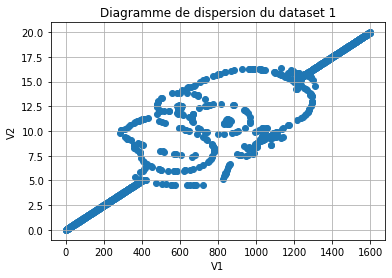

In [35]:
plt.scatter(L1, L2)
# Paramètres graphiques
plt.title('Diagramme de dispersion du dataset 1')   # Titre du graphique
plt.xlabel('V1')                       # Label du premier axe
plt.ylabel('V2')                       # Label du second
#plt.axis('equal')                      # Ratio d'échelle des deux axes à 1
plt.grid()                             # Ajout d'une grille
# Affichage
plt.show()

Pas de liens

Exercice ASSIDUITÉ ET RÉUSSITE

In [36]:
v1 = ['Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'Assidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu', 'NonAssidu']
v2 = ['Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Faible', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Moyen', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon', 'Bon']

In [37]:
v_cramer(v1,v2)

0.5778272211662074

Exercice DIVORCES ET MARGARINE

In [38]:
margarine = [3.719, 3.175, 2.948, 2.404, 2.359, 1.814, 2.087, 2.041, 1.905, 1.678]
divorce = [5, 4.7, 4.6, 4.4, 4.3, 4.1, 4.2, 4.2, 4.2, 4.1]

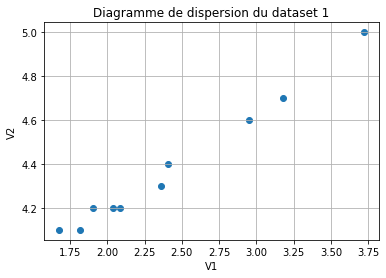

In [39]:
plt.scatter(margarine, divorce)
# Paramètres graphiques
plt.title('Diagramme de dispersion du dataset 1')   # Titre du graphique
plt.xlabel('V1')                       # Label du premier axe
plt.ylabel('V2')                       # Label du second
#plt.axis('equal')                      # Ratio d'échelle des deux axes à 1
plt.grid()                             # Ajout d'une grille
# Affichage
plt.show()

In [44]:
print(coefcor(margarine, divorce))

0.9925276423931426


Exercice EXERCICE BILAN

In [45]:
import csv
rawdata = []
data = dict()
with open('Pokemon.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        rawdata.append(row)
for i in range(len(rawdata[0])):
        data[rawdata[0][i]] = []
for l in rawdata[1:]:
    for i in range(len(rawdata[0])):
        data[rawdata[0][i]].append(l[i])

In [56]:
for elt in data.keys():
    print(elt)
for i in range(len(data["ID"])):
    data["ID"][i]=int(data["ID"][i])
for i in range(len(data["HP"])):
    data["HP"][i]=int(data["HP"][i])
for i in range(len(data["Attack"])):
    data["Attack"][i]=int(data["Attack"][i])
for i in range(len(data["Defense"])):
    data["Defense"][i]=int(data["Defense"][i])
for i in range(len(data["Sp. Atk"])):
    data["Sp. Atk"][i]=int(data["Sp. Atk"][i])
for i in range(len(data["Sp. Def"])):
    data["Sp. Def"][i]=int(data["Sp. Def"][i])
for i in range(len(data["Speed"])):
    data["Speed"][i]=int(data["Speed"][i])
for i in range(len(data["Generation"])):
    data["Generation"][i]=int(data["Generation"][i])
for i in range(len(data["Total"])):
    data["Total"][i]=int(data["Total"][i])

ID
Name
Form
Type1
Type2
Total
HP
Attack
Defense
Sp. Atk
Sp. Def
Speed
Generation


In [58]:
print(sorted(data["Attack"]),sorted(data["Defense"]),sorted(data["Speed"]))
print("Moyenne         : ",round(mean(data["Attack"]),2),round(mean(data["Defense"]),2),round(mean(data["Speed"]),2))
print("Médiane         : ",round(median(data["Attack"]),2)round(median(data["Defense"]),2)round(median(data["Speed"]),2))
print("Écart-type      : ",round(stdev(data["Attack"]),2),round(stdev(data["Defense"]),2),round(stdev(data["Speed"]),2))
print("Coef. de var.   : ",round(cofvar(data["Attack"]),2),round(cofvar(data["Defense"]),round(cofvar(data["Speed"]))
print("Étendue         : ",round(valrange(data["Attack"]),2),round(valrange(data["Defense"]),2),round(valrange(data["Speed"]),2))
print("Éc. interquart. : ",round(iquarange(data["Attack"]),2),round(iquarange(data["Defense"]),2),round(iquarange(data["Speed"]),2))
print("Prem.  quartile : ",round(quantile(data["Attack"],0.25),2),round(quantile(data["Defense"],0.25),2),round(quantile(data["Speed"],0.25),2))
print("Trois. quartile : ",round(quantile(data["Attack"],0.75),2),round(quantile(data["Defense"],0.75),2),round(quantile(data["Speed"],0.75),2))

SyntaxError: invalid syntax (187204043.py, line 3)